__Mark Freeman__ Start Date: 12/3/2017

# Speed Dating Data Analysis

Just a fun little project to kick around in some downtime when I don't really feel like writing any web or mobile development code.  I'm trying to get into machine learning and data science.  I've read a little bit on the topic and figure it's time for me to get my hands dirty with some actual projects.  This is just a small dataset I've downloaded from Kaggle on speed-dating.  It seemed the most fun, and it could generate some cool insights.

The data appears to be somewhat incomplete, and many of the labels will need to be decoded with a key to be fully understood.

## Loading the Data

In [16]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "speed_dating"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "assets", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [25]:
#we're just using a singular download of the data so we don't need to fetch it
import pandas as pd

def load_speed_dating_data():
    #keep in mind this will only work on my machine because this path is hardcoded
    directory_path = "file://localhost/home/mark/Desktop/jupyter/speed-dating-ml"
    file_name = "Speed Dating Data.csv"
    csv_path = os.path.join(directory_path, file_name)
    return pd.read_csv(csv_path, encoding='latin1', low_memory=False) #utf-8 encoding doesn't work, change to latin1

## Investigating the Data

In [30]:
dating_data = load_speed_dating_data()
dating_data.head(n=10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dating_data.describe()
#there are tons of features in this dataset, plus a lot of it looks incomplete.  For example,
#the positin1 column only has 6532 entries, while the overall dataset has 8378 entries.

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,15.0
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,8.093357,8.392552,7.662557,7.383996,6.824901,7.607639,7.932540,7.162698,7.041171,8.0
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.610309,1.459377,1.744322,1.959059,1.518977,1.505102,1.340868,1.674304,1.716015,0.0
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,8.0
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,8.0
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,8.0
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,8.0
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.0


In [20]:
dating_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 196 columns):
iid             int64
id              float64
gender          int64
idg             int64
condtn          int64
wave            int64
round           int64
position        int64
positin1        float64
order           int64
partner         int64
pid             float64
match           int64
int_corr        float64
samerace        int64
age_o           float64
race_o          float64
pf_o_att        float64
pf_o_sin        float64
pf_o_int        float64
pf_o_fun        float64
pf_o_amb        float64
pf_o_sha        float64
dec_o           int64
attr_o          float64
sinc_o          float64
intel_o         float64
fun_o           float64
amb_o           float64
shar_o          float64
like_o          float64
prob_o          float64
met_o           float64
age             float64
field           object
field_cd        float64
undergrad       object
mn_sat          float64
tuitio

It looks like most of the information is stored in floats.  This dataset is relatively small, at only 8378 entries.  It looks like there are 195 features to this data, which is quite a bit to my knowledge.  I've set the `verbose` parameter on the `.info()` method to be true to better show the data types of the features.

In [22]:
undergrad_column = dating_data["undergrad"] #modified the .csv and .doc, key was incorrect
undergrad_column.describe()

count            4914
unique            241
top       UC Berkeley
freq              107
Name: undergrad, dtype: object

Taking a look at one of the object types, we can see that it's simply a String.  It looks like some of the data was coded into integers, while a large portion of the information was left as is.  There are 241 unique entries for this particular feature, meaning we would need a fairly large coding set to represent each of these.

In [29]:
undergrad_column.value_counts().head(n=10)

UC Berkeley           107
Harvard               104
Columbia               95
Yale                   86
NYU                    78
UCLA                   66
Brown                  66
Cornell University     64
Smith College          59
Tufts University       47
Name: undergrad, dtype: int64

Judging from the above two rows, A little bit over half of the information was gathered from people who had attended college as an undergraduate, with many of these people coming from some pretty high tier schools.

## Issues with the Data

It looks like the researchers curating this data changed their methods around quite heavily during the process of collection.  On the whole, the collection of data got more intensive as the waves increased.  For example, the column sets denoting the 4th and 5th round of surveys were added after some waves had already gone through.

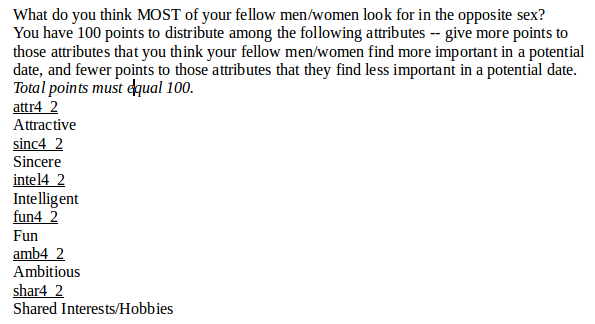

In [31]:
from IPython.display import Image
Image('assets/set_4.png')

In [38]:
set_1 = dating_data[["wave", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]]
set_1.head()
#set 1 is defined from the get-go on this data

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,15.0,20.0,20.0,15.0,15.0,15.0
1,1,15.0,20.0,20.0,15.0,15.0,15.0
2,1,15.0,20.0,20.0,15.0,15.0,15.0
3,1,15.0,20.0,20.0,15.0,15.0,15.0
4,1,15.0,20.0,20.0,15.0,15.0,15.0


In [39]:
set_4 = dating_data[["wave", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]]
set_4.head()

,wave,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN


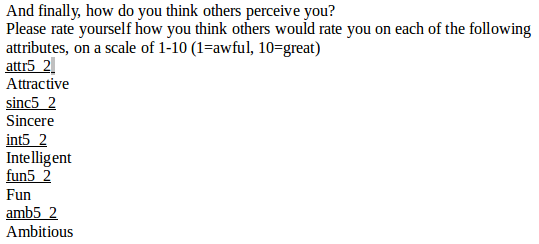

In [32]:
Image('assets/set_5.png')